In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import beta 
import pandas as pd 
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

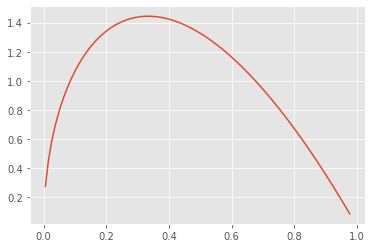

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999,a,b), 100)
plt.plot(x, beta.pdf(x,a,b))

In [15]:
# initial value
theta = 0.8
NMCS = 20000
epsilon = 0.5
theta_mcs = [theta]

for i in range(NMCS):
    theta_new = theta + epsilon * np.random.randn()
    if beta.pdf(theta_new,a,b) > beta.pdf(theta,a,b):
        theta = theta_new
    else:
        r = beta.pdf(theta_new,a,b) / beta.pdf(theta,a,b)
        if np.random.rand() < r:
            theta = theta_new
    theta_mcs.append(theta)

df = pd.DataFrame(theta_mcs)


In [16]:
df.head()

,0
0,0.800000
1,0.036032
2,0.257870
3,0.257870
4,0.257870


Text(0, 0.5, '$\\Theta$')

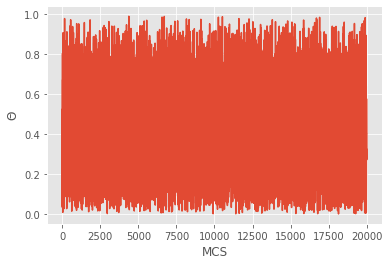

In [17]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$\Theta$")

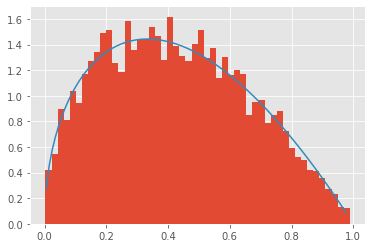

In [18]:
plt.hist(df[0][1000:], normed=True, bins=50)
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999,a,b), 100)
plt.plot(x, beta.pdf(x,a,b))